In [1]:
from fastai.vision.widgets import *
from fastbook import *

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', '2a0e6cfb544e42ccbcbde5a25354d178')

In [3]:
skin_types = 'black','asian','white'
path = Path('skin')

In [4]:
if not path.exists():
    path.mkdir()
    for o in skin_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} skin')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [5]:
fns = get_image_files(path)
fns

(#413) [Path('skin/black/00000047.jpg'),Path('skin/black/00000036.jpg'),Path('skin/black/00000030.jpg'),Path('skin/black/00000097.jpg'),Path('skin/black/00000110.jpg'),Path('skin/black/00000029.jpg'),Path('skin/black/00000112.jpg'),Path('skin/black/00000091.jpg'),Path('skin/black/00000093.jpg'),Path('skin/black/00000090.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#0) []

In [7]:
failed.map(Path.unlink);

In [8]:
skins = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = skins.dataloaders(path)

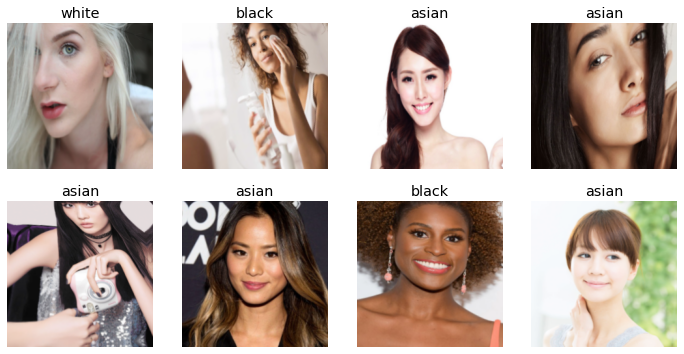

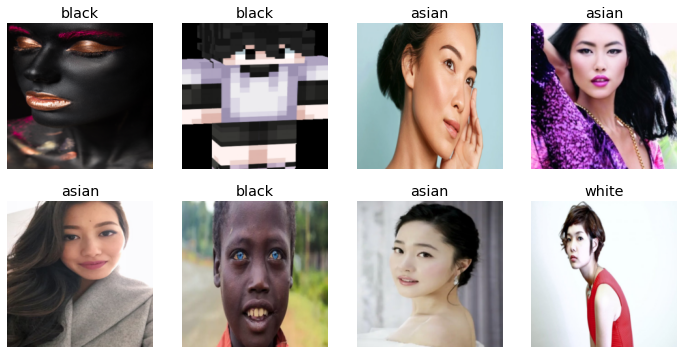

In [9]:
dls.train.show_batch (max_n=8, nrows=2)
dls.valid.show_batch (max_n=8, nrows=2)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.924794,1.878629,0.475610,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.248963,1.212333,0.402439,00:10
1,1.036239,0.770428,0.280488,00:09
2,0.895331,0.735125,0.256098,00:10
3,0.760799,0.751890,0.243902,00:11
4,0.678474,0.734624,0.256098,00:10


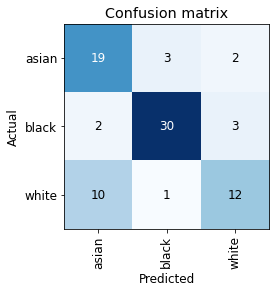

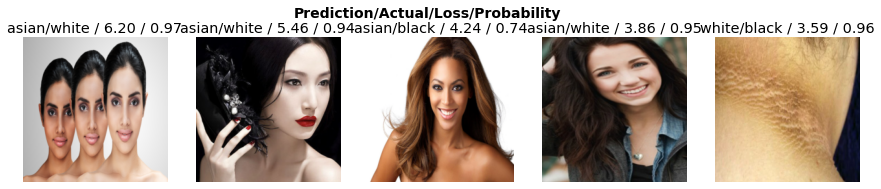

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [12]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [13]:
learn_inf = load_learner(path/'export.pkl')

In [14]:
response = requests.get("https://thesilverlab.es/wp-content/uploads/2021/09/Mentor_Ana-Lorente_.jpg")
file = open("Ana.jpg", "wb")
file.write(response.content)
file.close()
path.ls(file_exts='.jpg')

(#1) [Path('Ana.jpg')]

In [15]:
learn_inf.dls.vocab

['asian', 'black', 'white']

In [16]:
img = PILImage.create ('Ana.jpg')
pred,pred_idx,probs = learn_inf.predict(img)


In [17]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Predicction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Predicction: white; Probability: 0.5305')

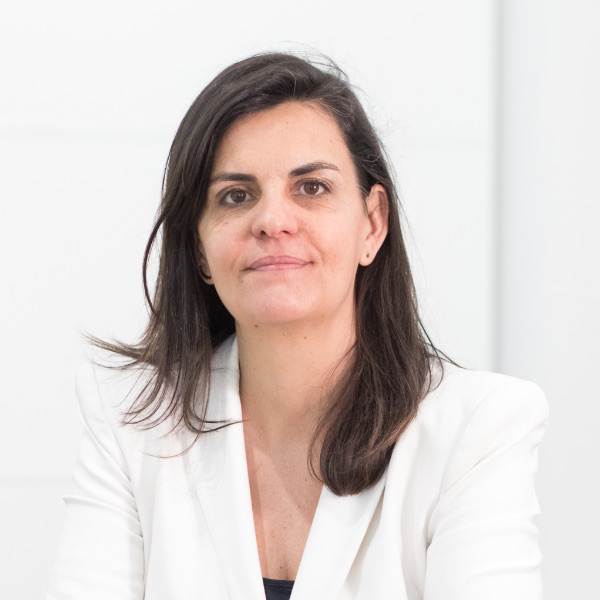

In [18]:
img